<a href="https://colab.research.google.com/github/katenevm/global_sales_analysis/blob/main/Global_Product_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Mate/dataset/13. Final project

Mounted at /content/drive
/content/drive/MyDrive/Mate/dataset/13. Final project


**The main goal is to clean and analyze data; find valuable insights into the company's operations.**

# **Exploratory Data Analysis**

In [ ]:
countries = pd.read_csv("countries.csv")
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
events = pd.read_csv("events.csv")
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
products = pd.read_csv("products.csv")
products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
print(f'Columns and rows in the countries: {countries.shape}')
print(f'Columns and rows in the events: {events.shape}')
print(f'Columns and rows in the products: {products.shape}')

Columns and rows in the countries: (249, 5)
Columns and rows in the events: (1330, 10)
Columns and rows in the products: (12, 2)


In [ ]:
print(f'All data types in the countries: {countries.dtypes}')
print(f'All data types in the events: {events.dtypes}')
print(f'All data types in the products: {products.dtypes}')

All data types in the countries: name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object
All data types in the events: Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
dtype: object
All data types in the products: id            int64
item_type    object
dtype: object


**Converting DataTypes**

In [ ]:
events['Order Date'] = pd.to_datetime(events['Order Date'])
events['Ship Date'] = pd.to_datetime(events['Ship Date'])

**Missing values checking**

In [ ]:
print(f'countries info: {countries.info()}')
print(f'events info: {events.info()}')
print(f'products info: {products.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
countries info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1248 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-nu

There are some missing values, that we wil handle later

In [ ]:
print(f'countries describe: {countries.describe()}')
print('')
print(f'events describe: {events.describe()}')
print('')
print(f'products describe: {products.describe()}')

countries describe:                name alpha-2 alpha-3  region          sub-region
count           249     248     249     248                 248
unique          249     248     249       5                  17
top     Afghanistan      AF     AFG  Africa  Sub-Saharan Africa
freq              1       1       1      60                  53

events describe:            Order ID                     Order Date  \
count  1.330000e+03                           1330   
mean   5.412048e+08  2013-10-12 06:09:12.180451072   
min    1.006406e+08            2010-01-01 00:00:00   
25%    3.190004e+08            2011-12-16 06:00:00   
50%    5.387164e+08            2013-10-17 00:00:00   
75%    7.544628e+08            2015-08-28 18:00:00   
max    9.998797e+08            2017-07-23 00:00:00   
std    2.573882e+08                            NaN   

                           Ship Date   Product ID   Units Sold   Unit Price  \
count                           1330  1330.000000  1328.000000  1330.000000 

In [ ]:
print(f'countries missing valiues: {countries.isna().sum()}')
print('')
print(f'events missing valiues: {events.isna().sum()}')
print('')
print(f'products missing valiues: {products.isna().sum()}')

countries missing valiues: name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64

events missing valiues: Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64

products missing valiues: id           0
item_type    0
dtype: int64


In [ ]:
countriies_missing_values = countries[countries.isna().any(axis=1)]
countriies_missing_values = pd.DataFrame(countriies_missing_values)

In [ ]:
countriies_missing_values

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN
153,Namibia,NaN,NAM,Africa,Sub-Saharan Africa


In [ ]:
countries.loc[countries['name'] == 'Antarctica', ['region', 'sub-region']] = 'Antarctica'
countries.loc[countries['name'] == 'Namibia', ['alpha-2']] = 'NA'

In [ ]:
events_missing_values = events[events.isna().any(axis=1)]
events_missing_values = pd.DataFrame(events_missing_values)
events_units_sold_missing_values = events[events['Units Sold'].isna()]
events_units_sold_missing_values = pd.DataFrame(events_units_sold_missing_values)

In [ ]:
events_units_sold_missing_values

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
183,217165648,2014-05-20,2014-06-08,M,ESP,8875,Offline,NaN,421.89,364.69
319,309655511,2014-05-05,2014-05-21,C,HRV,3127,Offline,NaN,81.73,56.67


In [ ]:
print(events['Units Sold'].isna().sum() / events.shape[0] * 100)

0.15037593984962408


We have missing values of how much Meat and Personal Care products were sold, but there is a very small part of the whole dataset (only 0.15%), so we can delete them.

In [ ]:
events = events.dropna(subset=['Units Sold'])

Country code column has a lot of missing values, that we can drop, so we hgave to consider them as Unknown countrie

In [ ]:
events['Country Code'] = events['Country Code'].fillna('Unknown')

<ipython-input-19-870ec332b2e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events['Country Code'] = events['Country Code'].fillna('Unknown')


In [ ]:
duplicate_country_rows = countries.duplicated()
print(f'If there are any duplicated rows in the country dataset: {duplicate_country_rows}')
print('')
print(f'number of duplicated rows in the country dataset: {duplicate_country_rows.sum()}')
print('')
duplicated_events_rows = events.duplicated()
print(f'If there are any duplicated rows in the events dataset: {duplicated_events_rows}')
print('')
print(f'number of duplicated rows in the events dataset: {duplicated_events_rows.sum()}')
print('')
duplicated_products_rows = products.duplicated()
print(f'If there are any duplicated rows in the products dataset: {duplicated_products_rows}')
print('')
print(f'number of duplicated rows in the products dataset: {duplicated_products_rows.sum()}')

If there are any duplicated rows in the country dataset: 0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 249, dtype: bool

number of duplicated rows in the country dataset: 0

If there are any duplicated rows in the events dataset: 0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1328, dtype: bool

number of duplicated rows in the events dataset: 0

If there are any duplicated rows in the products dataset: 0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

number of duplicated rows in the products dataset: 0


There are no duplicates

# **Data Analysis and Visualization**

Questions:
- most sold product
- most profitable products
- most profitable country
- shipment duration for each country
- correlation between the number of orders and the shipment duration
- sales chanel for each country
- sales chanel for each product
- who tend to buy more (online or offline customers)

**Creating one table with all the relevant information**

In [ ]:
# Join events with countries on 'Country Code' and 'alpha-3'
events_with_countries = pd.merge(
    events, countries,
    left_on='Country Code',
    right_on='alpha-3',
    how='left'
)

# Join the resulting table with products on 'Product ID' and 'id'
total_info = pd.merge(
    events_with_countries, products,
    left_on='Product ID',
    right_on='id',
    how='left'
)

total_info['name'] = total_info['name'].fillna('Unknown')


total_info = total_info[[
    'Order ID',
    'Order Date',
    'Ship Date',
    'Order Priority',
    'Country Code',
    'name',  # Country name from countries table
    'Product ID',
    'item_type',  # Product item_type from products table
    'Sales Channel',
    'Units Sold',
    'Unit Price',
    'Unit Cost'
]]


# Creating Profit column

total_info['Profit'] = total_info['Unit Price'] * total_info['Units Sold'] - total_info['Unit Cost'] * total_info['Units Sold']
total_info['Shipment Duration'] = total_info['Ship Date'] - total_info['Order Date']
total_info

total_info

,Order ID,Order Date,Ship Date,Order Priority,Country Code,name,Product ID,item_type,Sales Channel,Units Sold,Unit Price,Unit Cost,Profit,Shipment Duration
0,100640618,2014-10-08,2014-10-18,M,NOR,Norway,2103,Cereal,Online,650.0,205.70,117.11,57583.50,10 days
1,100983083,2016-08-11,2016-08-11,C,SRB,Serbia,2103,Cereal,Offline,1993.0,205.70,117.11,176559.87,0 days
2,101025998,2014-07-18,2014-08-11,M,Unknown,Unknown,7940,Household,Online,4693.0,668.27,502.54,777770.89,24 days
3,102230632,2017-05-13,2017-06-13,L,MNE,Montenegro,2455,Clothes,Online,1171.0,109.28,35.84,85998.24,31 days
4,103435266,2012-08-11,2012-09-18,H,SRB,Serbia,1270,Beverages,Offline,7648.0,47.45,31.79,119767.68,38 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,994504153,2017-01-10,2017-01-13,M,SWE,Sweden,4594,Fruits,Online,4734.0,9.33,6.92,11408.94,3 days
1324,994978797,2014-12-05,2015-01-02,H,ITA,Italy,1270,Beverages,Offline,5192.0,47.45,31.79,81306.72,28 days
1325,996754205,2010-09-20,2010-09-22,L,RUS,Russia,7331,Baby Food,Offline,574.0,255.28,159.42,55023.64,2 days
1326,998043382,2010-06-15,2010-07-03,H,MLT,Malta,8293,Cosmetics,Online,2070.0,437.20,263.33,359910.90,18 days


**Ploting Sold Items through the time additionaly checking if there are any outliers**

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = total_info['Units Sold'].quantile(0.25)
Q3 = total_info['Units Sold'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = total_info[(total_info['Units Sold'] < lower_bound) | (total_info['Units Sold'] > upper_bound)]

print(f'Outliers in Units Sold:{outliers}')


Outliers in Units Sold:Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Order Priority, Country Code, name, Product ID, item_type, Sales Channel, Units Sold, Unit Price, Unit Cost, Profit, Shipment Duration]
Index: []


Average units sold: 72269.4945054945


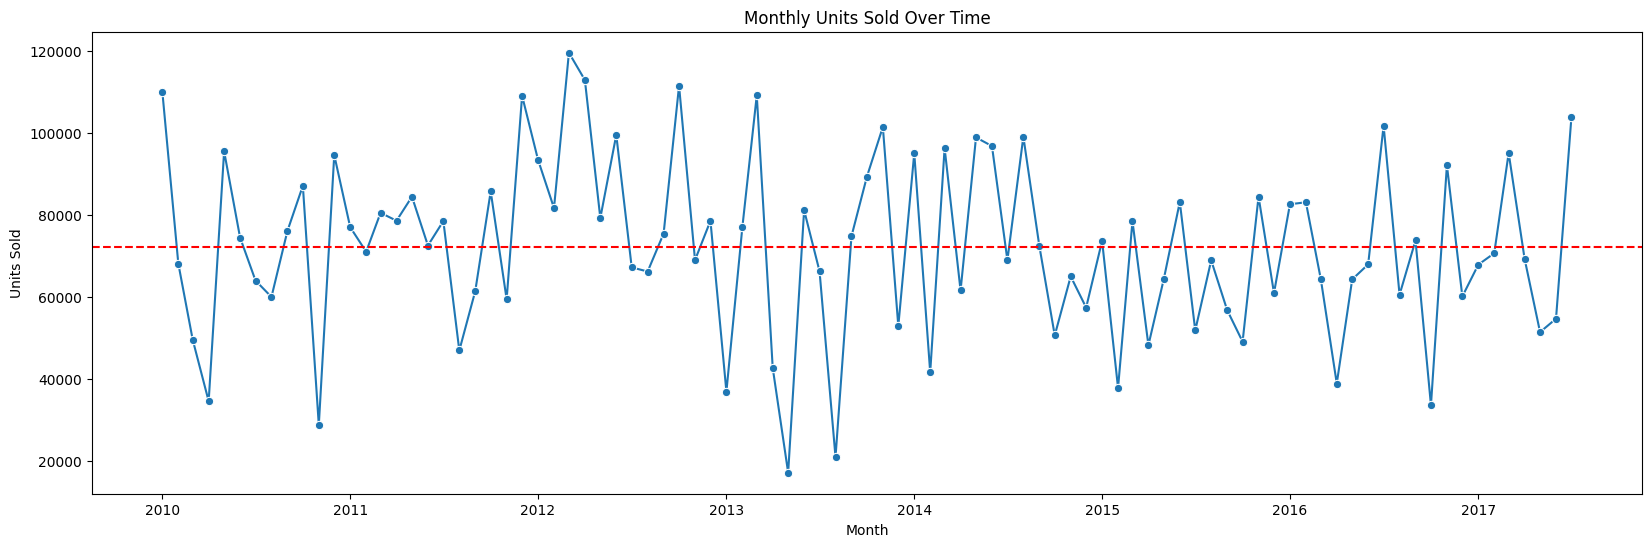

In [ ]:
# Seraching for outliers
total_info['Order Date'] = pd.to_datetime(total_info['Order Date'])
total_info['Year-Month'] = total_info['Order Date'].dt.to_period('M')

monthly_sales = total_info.groupby('Year-Month')['Units Sold'].sum().reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].dt.to_timestamp()

average = monthly_sales['Units Sold'].mean()
print(f'Average units sold: {average}')

plt.figure(figsize=(20, 6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='Units Sold', marker='o')
plt.title('Monthly Units Sold Over Time')
plt.axhline(y=average, color='r', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Units Sold')

plt.show()


Seems, there are no outliers in the solded items

**Profit distribution**

Average profit: 478011.8770257388
Max profit date: 2012-12-14 00:00:00
Max profit: 3246187.75


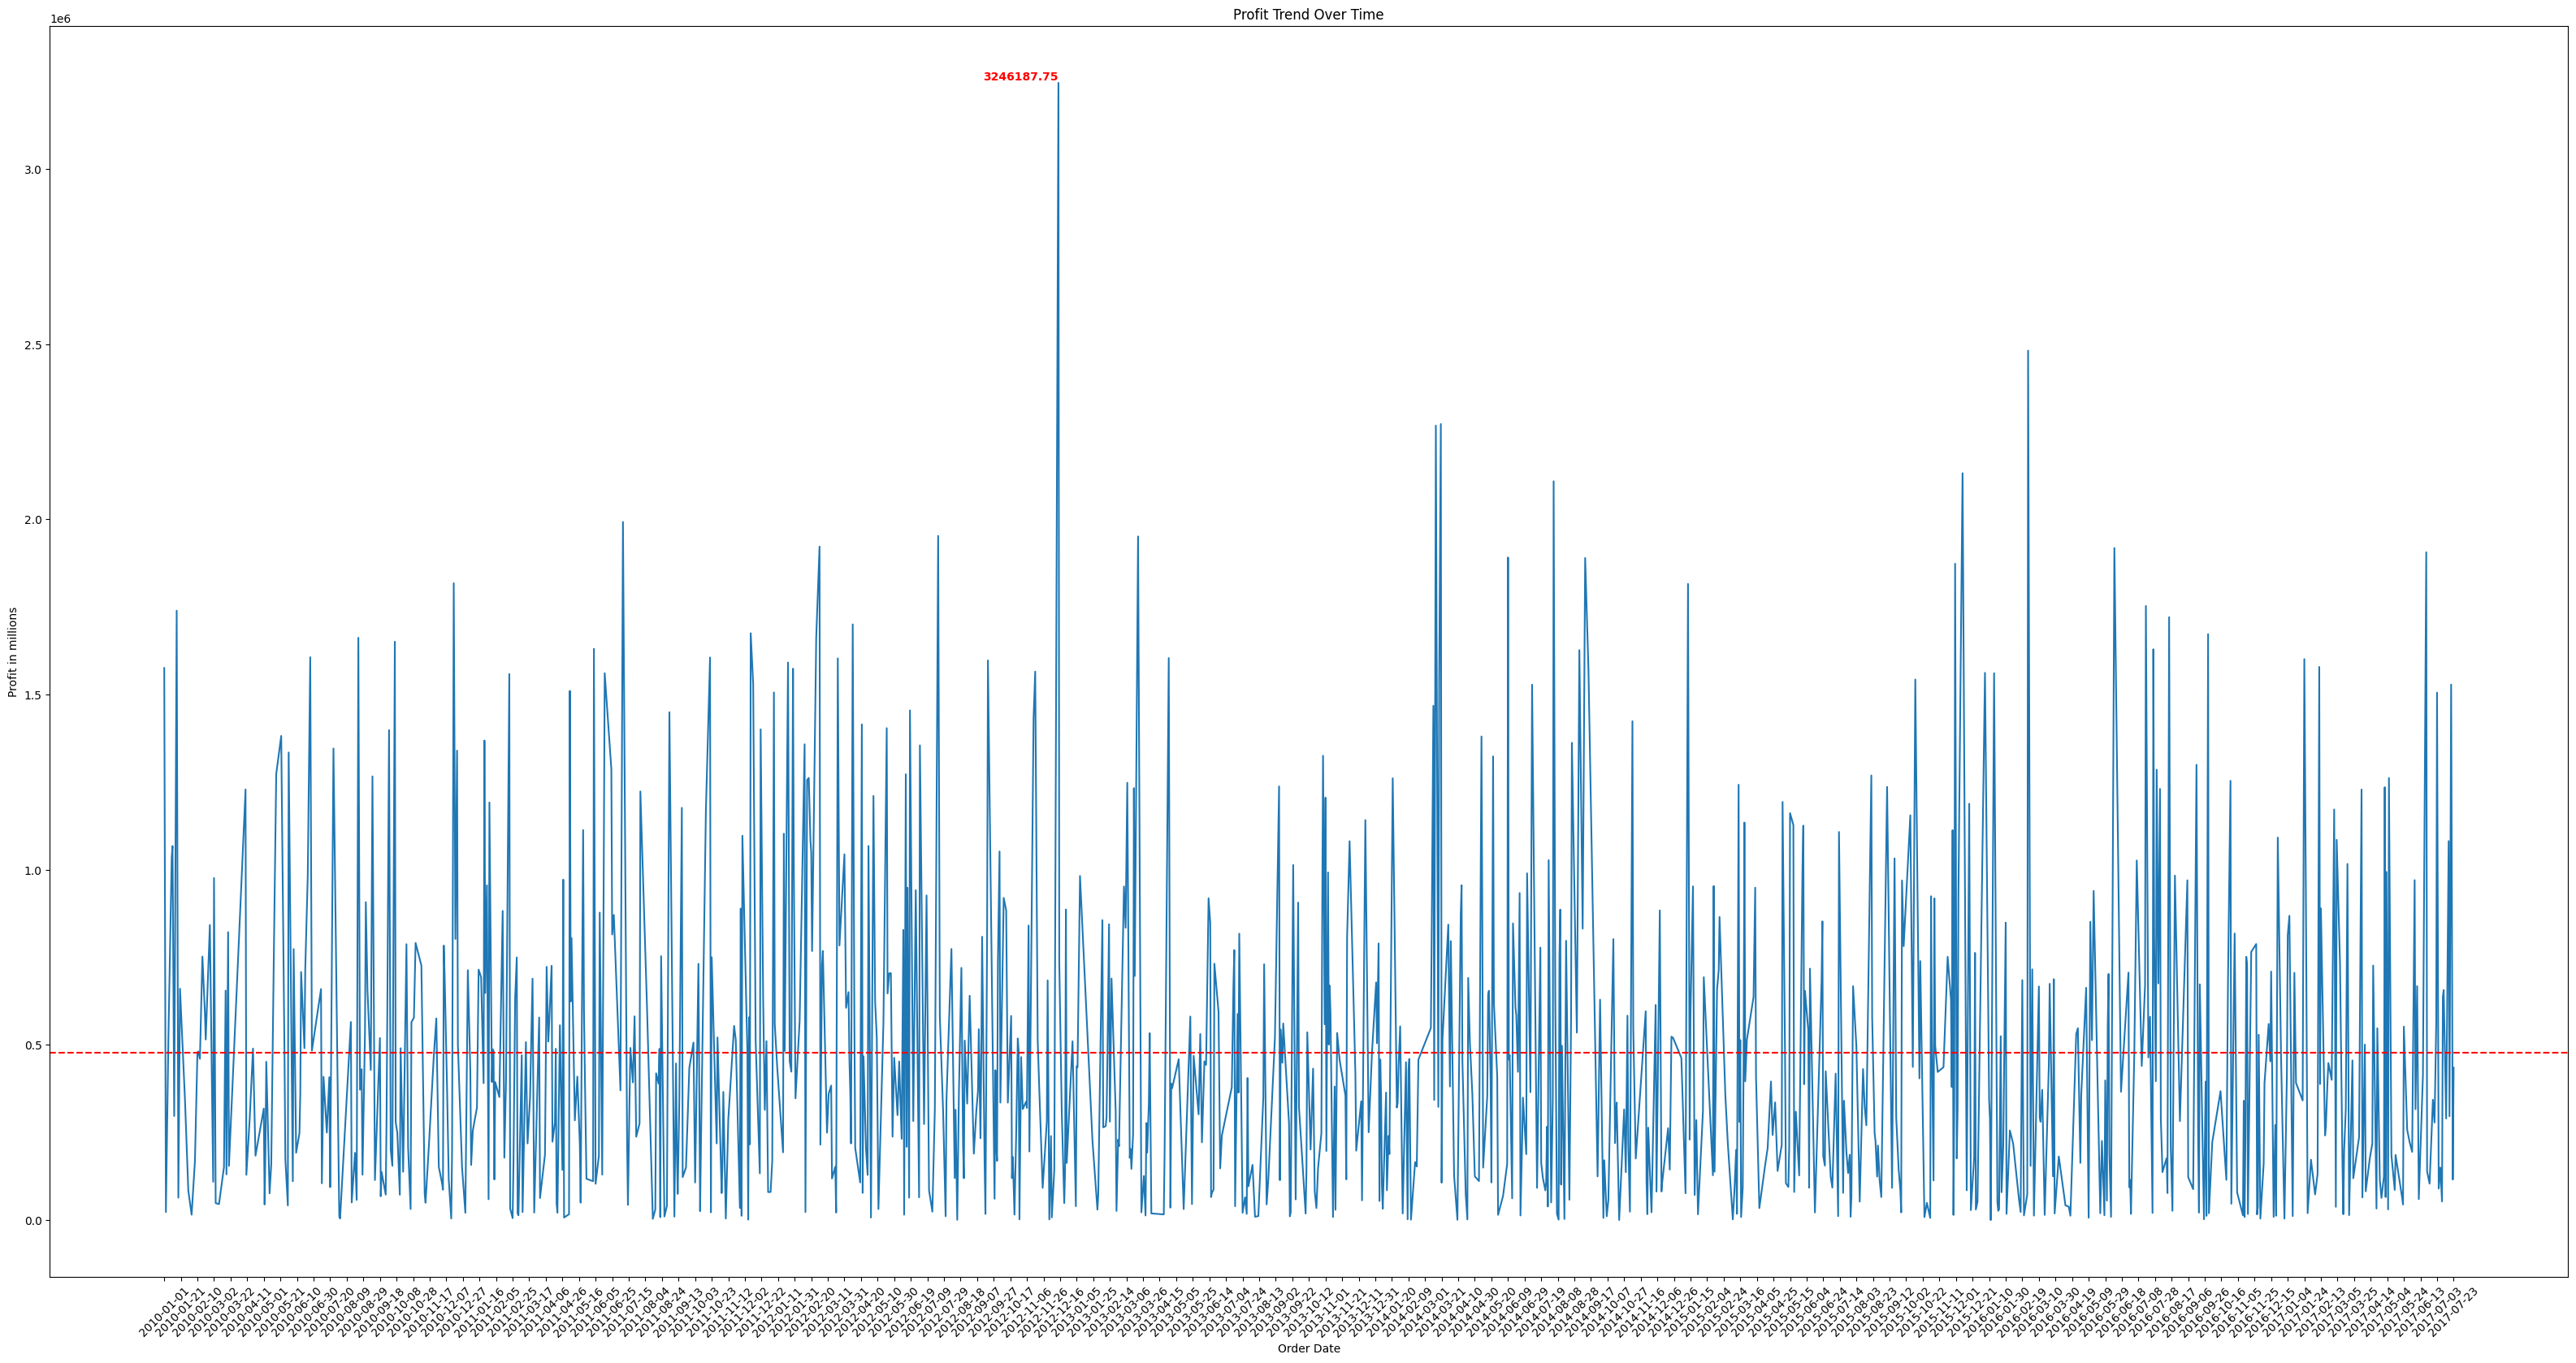

In [ ]:
date_profit = total_info.groupby('Order Date')['Profit'].sum()

average = date_profit.mean()
print(f'Average profit: {average}')

plt.figure(figsize = (40, 20))

max_profit_date = date_profit.idxmax()  # Get the date of max profit
max_profit = date_profit.max()  # Get the max profit value
print(f'Max profit date: {max_profit_date}')
print(f'Max profit: {max_profit}')

sns.lineplot(data=date_profit)
plt.title('Profit Trend Over Time')
plt.xlabel('Order Date')
plt.ylabel('Profit in millions')
x_ticks = np.arange(date_profit.index.min(), date_profit.index.max() + pd.Timedelta(days=1), pd.Timedelta(days=20))
plt.text(
    max_profit_date,  # x-coordinate
    max_profit,       # y-coordinate
    f'{max_profit:.2f}',  # Text to display (max profit)
    ha='right', va='bottom', fontsize=10, color='red', weight='bold'
)
plt.axhline(y=average, color='r', linestyle='--')
plt.xticks(x_ticks, rotation=45)
plt.show()

**It can be seen one the most succsessfull day, that seems to be an outlier. Since we not gonna work with this now, we will not fix that yet and will let it be as it is now**

**MOST POPULAR PRODUCT**

In [ ]:
# What is the most popular product

popular_products = total_info.groupby('item_type')['Units Sold'].sum()
popular_products = pd.DataFrame(popular_products)
popular_products = popular_products.sort_values(by='Units Sold', ascending=False)
popular_products

,Units Sold
item_type,
Office Supplies,617641.0
Beverages,613133.0
Fruits,591672.0
Clothes,591385.0
Vegetables,582544.0
Baby Food,562706.0
Personal Care,557678.0
Cosmetics,533291.0
Meat,530380.0


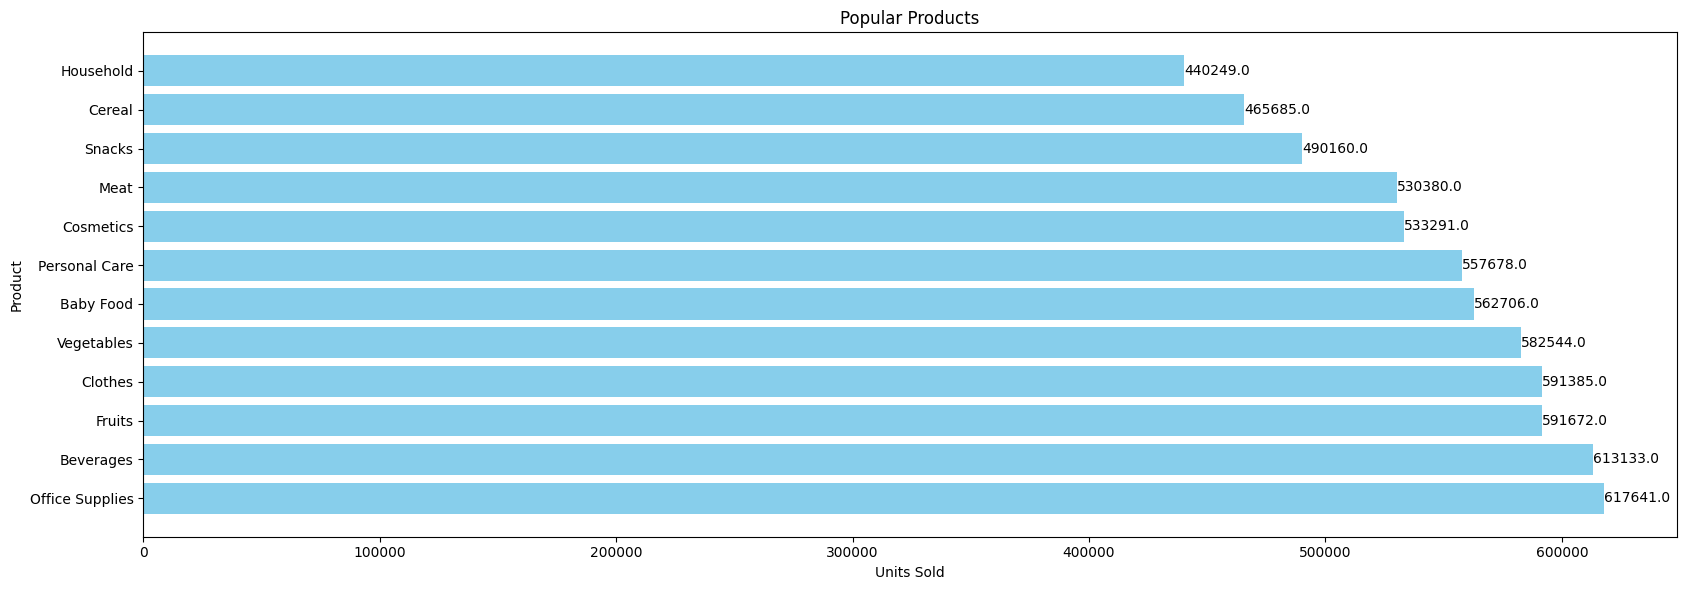

In [ ]:
plt.figure(figsize=(17, 6))

plt.barh(popular_products.index, popular_products['Units Sold'], color='skyblue')
plt.xlabel('Units Sold')
plt.ylabel('Product')
plt.title('Popular Products')

# Adding numbers to the bars
for i, v in enumerate(popular_products['Units Sold']):
    plt.text(v + 0.5, i, str(v), va='center')

plt.tight_layout()
plt.show()


So it can be seen, that the most popular products are Office Supplies, Beverages and Fruits

In [ ]:
country_products_sold = total_info.groupby(['name', 'item_type'])['Units Sold'].sum()
country_products_sold = pd.DataFrame(country_products_sold)
country_products_sold = country_products_sold.sort_values(by='Units Sold', ascending=False)
country_products_sold


Units Sold
name          item_type                  
Unknown       Fruits              60537.0
              Meat                53147.0
              Vegetables          50034.0
Hungary       Baby Food           40479.0
Macedonia     Beverages           39284.0
...                                   ...
Belgium       Household             206.0
Slovakia      Meat                  166.0
Switzerland   Office Supplies       150.0
Liechtenstein Cosmetics             138.0
Netherlands   Vegetables             22.0

[500 rows x 1 columns]

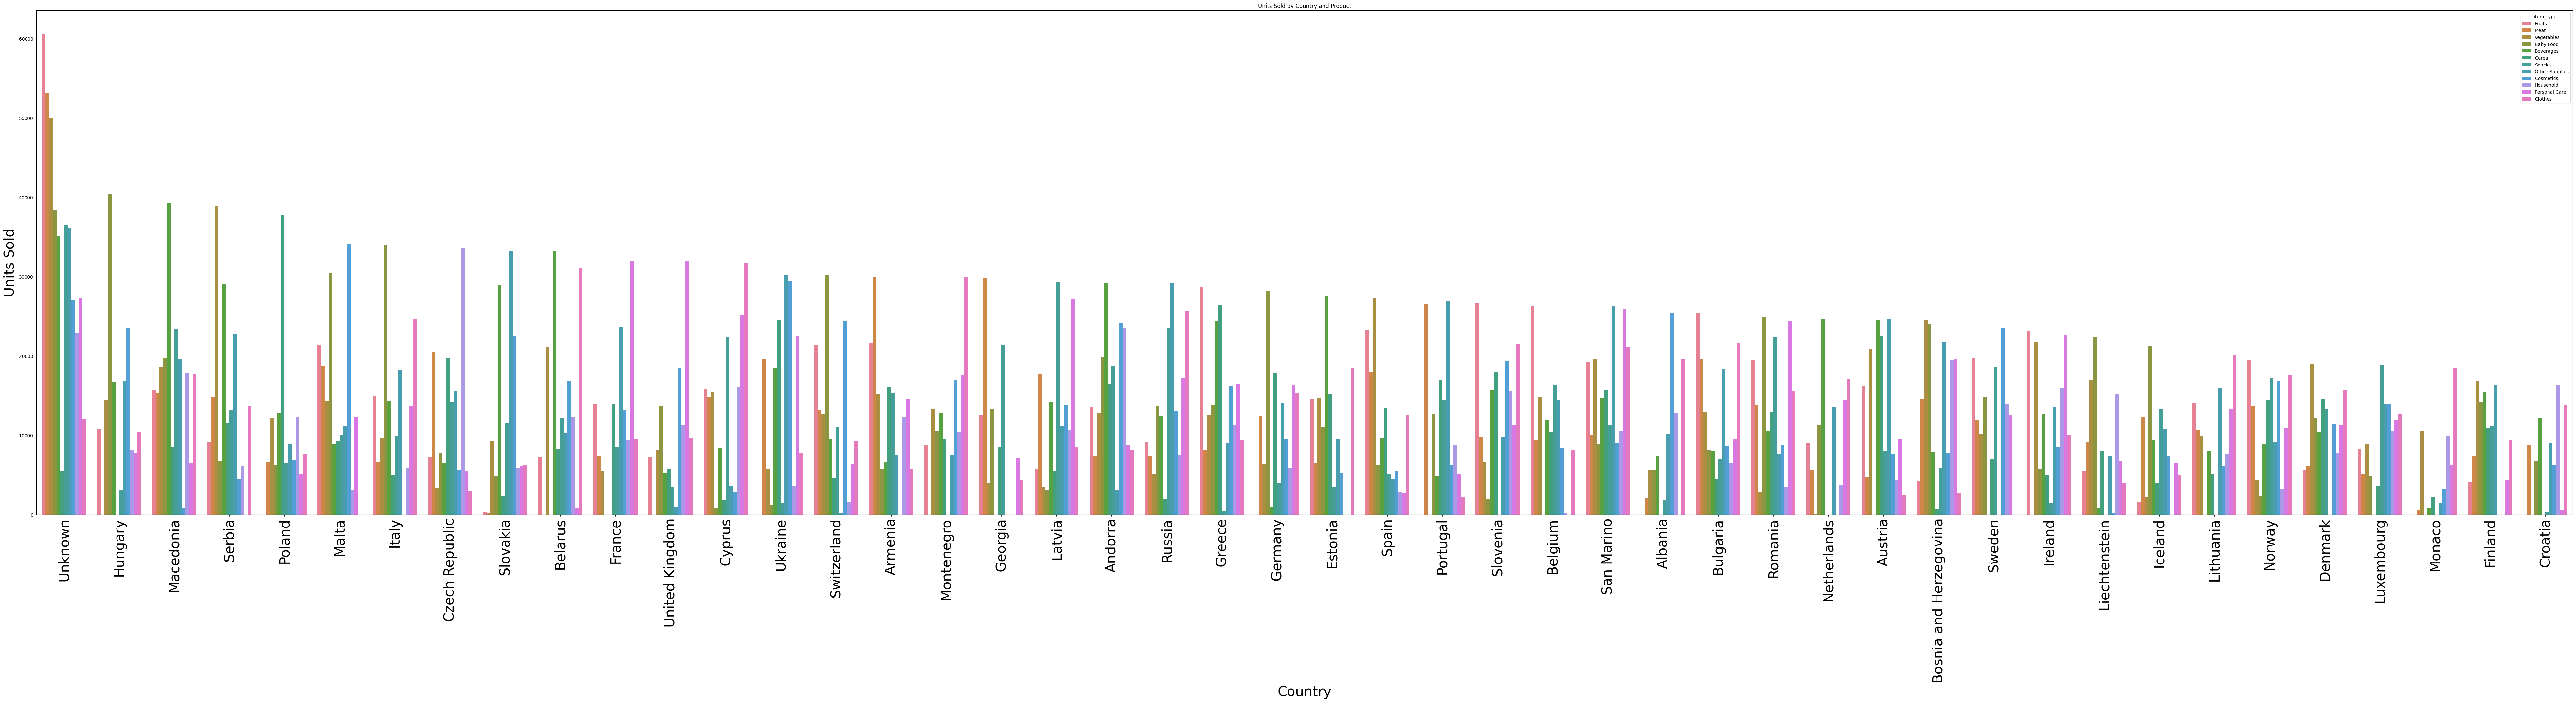

In [ ]:
plt.figure(figsize=(100, 20))

sns.barplot(x=country_products_sold.index.get_level_values(0), y=country_products_sold['Units Sold'], hue=country_products_sold.index.get_level_values(1))
plt.xticks(rotation=90, fontsize=30)
plt.xlabel('Country', fontsize=30)
plt.ylabel('Units Sold', fontsize=30)
plt.title('Units Sold by Country and Product')
plt.show()

From the known countries
- Hungary is the biggest buyer (the most popular product there is a Baby Food)
- Then the second biggest buyer is Macedonia with the Beverages preferences
- Third biggest buyer is a Serbia with the Vegetables preferences
- Croatia and Finland buy less than other countries

**Profit column**

**Most profitable product**

In [ ]:
profitable_product = total_info.groupby('item_type')['Profit'].sum()
profitable_product = pd.DataFrame(profitable_product)
profitable_product.sort_values(by='Profit', ascending=False)
profitable_product

,Profit
item_type,
Baby Food,53940997.16
Beverages,9601662.78
Cereal,41255034.15
Clothes,43431314.40
Cosmetics,92723306.17
Fruits,1425929.52
Household,72962466.77
Meat,30337736.00
Office Supplies,77977176.25


Text(0.5, 1.0, 'Most Profitable Product')

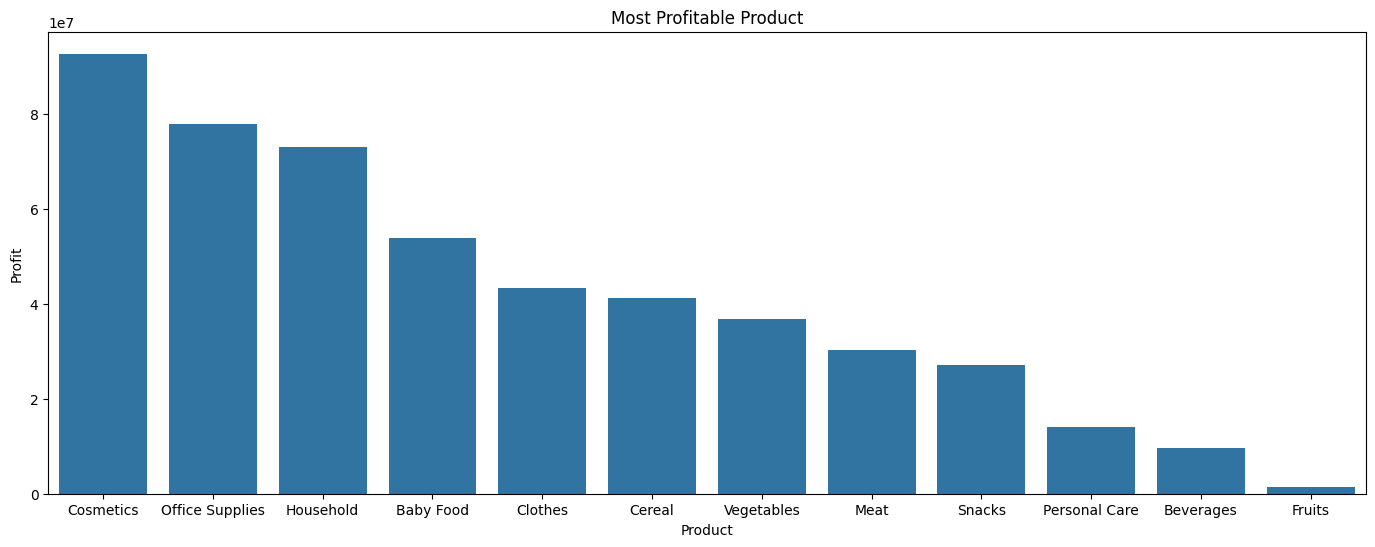

In [ ]:
plt.figure(figsize=(17, 6))

sns.barplot(data=profitable_product, x = 'item_type', y = 'Profit', order = profitable_product.sort_values(by='Profit', ascending=False).index)
plt.xlabel('Product')
plt.ylabel('Profit')
plt.title('Most Profitable Product')

In [ ]:
profitable_country = total_info.groupby('name')['Profit'].sum()
profitable_country= pd.DataFrame(profitable_country)
profitable_country.sort_values(by='Profit', ascending=False)
profitable_country = profitable_country.head(20)

Text(0.5, 1.0, 'Most Profitable Country')

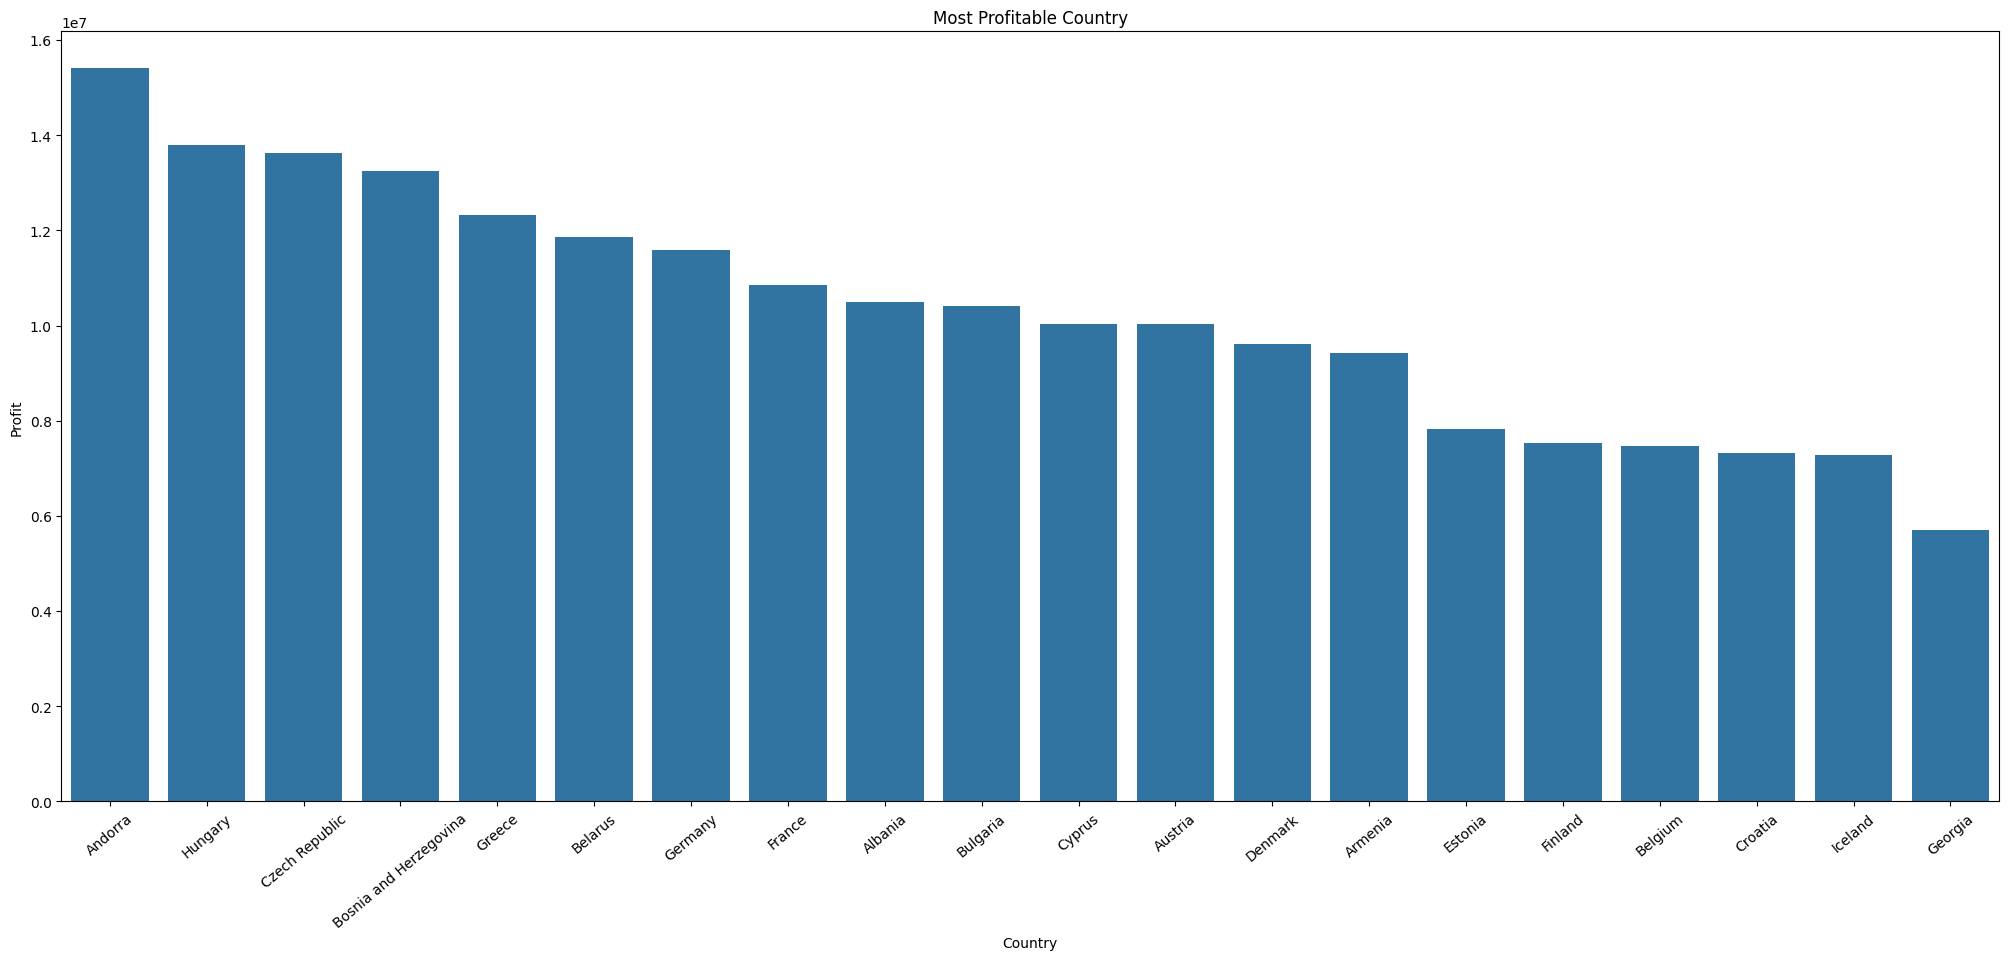

In [ ]:
plt.figure(figsize=(25, 10))

sns.barplot(data=profitable_country, x = 'name', y = 'Profit', order = profitable_country.sort_values(by='Profit', ascending=False).index)
plt.xlabel('Country')
x_ticks = plt.xticks(rotation=40)
plt.ylabel('Profit')
plt.title('Most Profitable Country')


- Andorra
- Hungary
- Czech Republic

are the most proffitable countries

In [ ]:
profitable_country_product = total_info[total_info['name'].isin(['Andorra', 'Hungary', 'Czech Republic', 'Bosnia and Herzegovina', 'Greece'])]
profitable_country_product = profitable_country_product.groupby(['name', 'item_type'])['Profit'].sum()
profitable_country_product= pd.DataFrame(profitable_country_product).reset_index() #  is used to convert an index into a column
profitable_country_product


,name,item_type,Profit
0,Andorra,Baby Food,1899753.48
1,Andorra,Beverages,458242.92
2,Andorra,Cereal,1462177.95
3,Andorra,Clothes,596112.48
4,Andorra,Cosmetics,4198091.15
5,Andorra,Fruits,32778.41
6,Andorra,Household,3899958.36
7,Andorra,Meat,420706.00
8,Andorra,Office Supplies,381275.00
9,Andorra,Personal Care,220753.54


Text(0.5, 1.0, 'Most Profitable Country and Product')

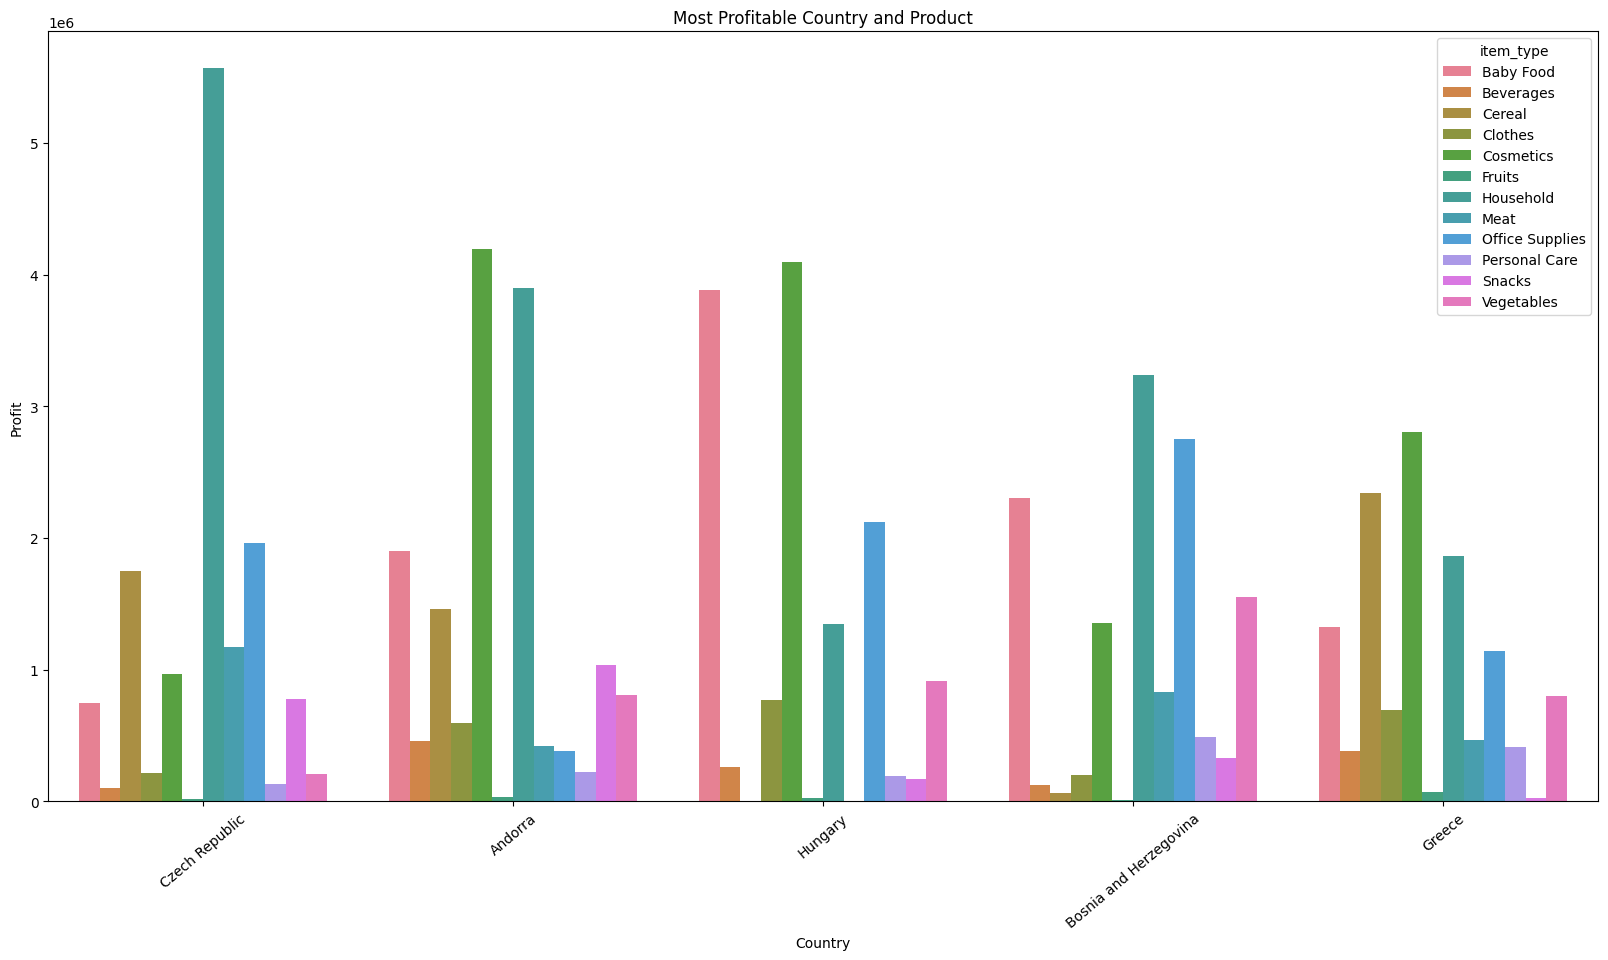

In [ ]:
plt.figure(figsize = (20, 10))
sorted_profitable_country_product = profitable_country_product.sort_values(by='Profit', ascending=False)

sns.barplot(data=profitable_country_product, x = 'name', y = 'Profit', hue = 'item_type', order = sorted_profitable_country_product['name'])
plt.xlabel('Country')
x_ticks = plt.xticks(rotation=40)
plt.ylabel('Profit')
plt.title('Most Profitable Country and Product')

This graph shows, that different countries tend to spend more on different produt types
 - for the Czech Republic the most favoured products are fruits
 - Andorra is in the list of the most proffitable countries, becuse they spend a lot on the Households, also they buy a lot of cosmetics
 - Hungary buy more cosmetics

**Shipment duration for each country**

In [ ]:
shipment_country = total_info.groupby('name')['Shipment Duration'].mean()
shipment_country = pd.DataFrame(shipment_country)
shipment_country = shipment_country.sort_values(by='Shipment Duration', ascending=False)
shipment_country

,Shipment Duration
name,
Hungary,32 days 15:21:36
Georgia,29 days 16:41:44.347826087
Austria,28 days 12:00:00
Slovakia,28 days 11:12:00
Luxembourg,27 days 18:00:00
Lithuania,27 days 13:26:24
Poland,27 days 11:08:34.285714285
Russia,27 days 09:00:00
Monaco,26 days 20:18:27.692307692


In [ ]:
shipment_country.describe()

,Shipment Duration
count,46
mean,24 days 19:57:40.275419668
std,2 days 21:36:16.233047151
min,18 days 08:28:14.117647058
25%,23 days 06:44:18.461538461
50%,25 days 05:06:34.838709677
75%,26 days 14:28:50.769230769
max,32 days 15:21:36


Text(0.5, 1.0, 'Shipment Duration for Each Country')

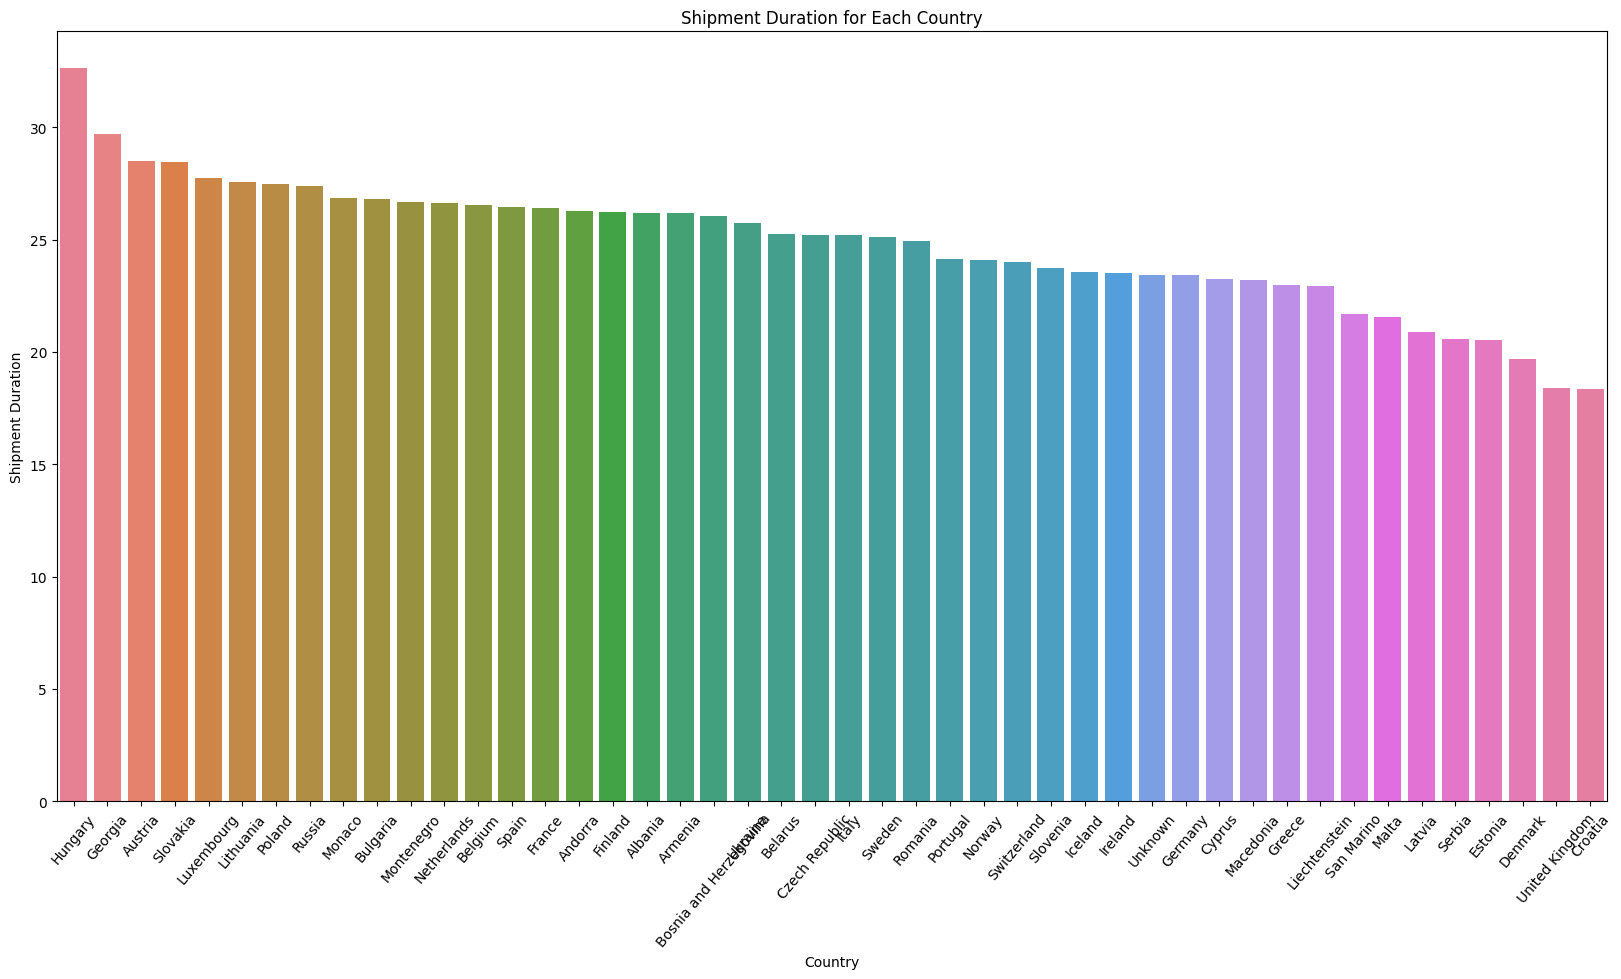

In [ ]:
plt.figure(figsize = (20, 10))

shipment_country['Shipment Duration (days)'] = shipment_country['Shipment Duration'].dt.total_seconds() / (24 * 3600)

sns.barplot(data=shipment_country, x = 'name', y = 'Shipment Duration (days)', hue = 'name')
plt.xlabel('Country')
x_ticks = plt.xticks(rotation=50)
plt.ylabel('Shipment Duration')
plt.title('Shipment Duration for Each Country')

The longer average waiting time more than 30 days has Hungary( mostly buy Fruits) and the lowest waiting time has a Croatia (mostly buy Personal care, clothes)

**Correlation between the Number of items, that people buya and the shipping time**

maybe if there are more orders, it should take longer time to deliver it

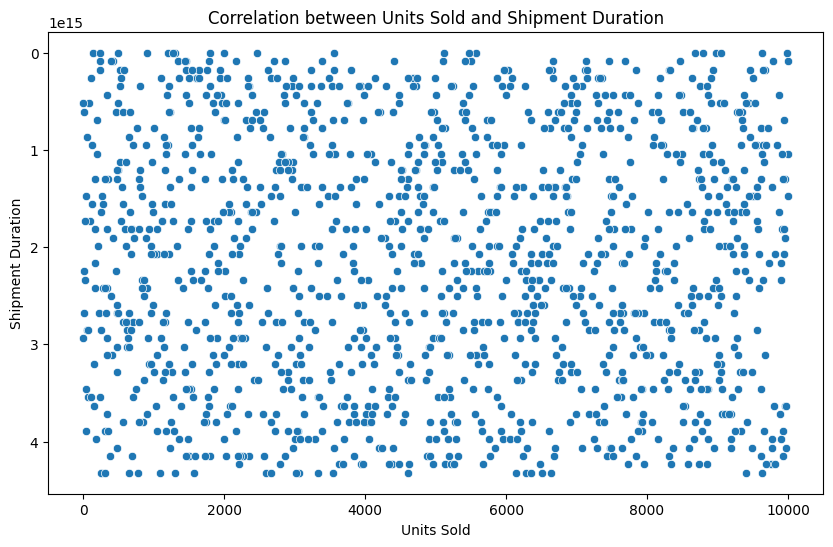

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=total_info, x='Units Sold', y='Shipment Duration')
plt.xlabel('Units Sold')
plt.ylabel('Shipment Duration')
plt.title('Correlation between Units Sold and Shipment Duration')
plt.show()

**NO CORRELATION**

**Correlation between profit and Shipment duration**
Maybe if there are more profit from the Order, it will be shipped as a priority

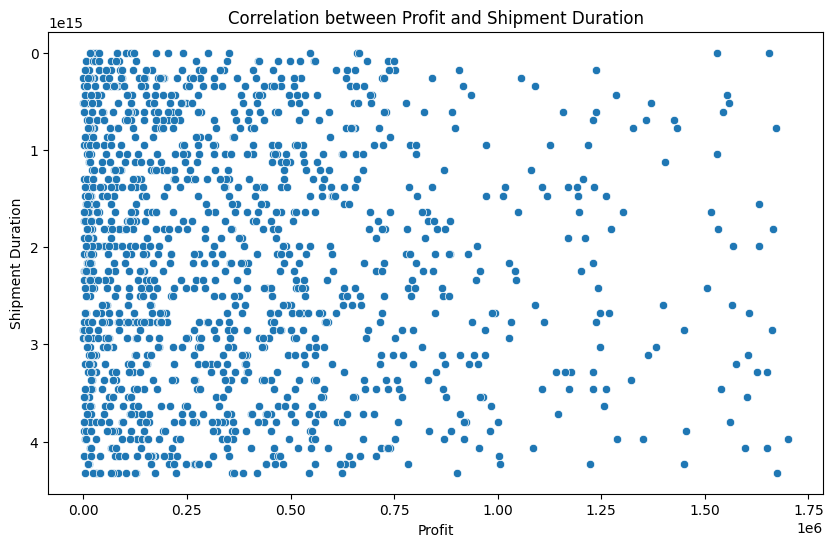

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=total_info, x='Profit', y='Shipment Duration')
plt.xlabel('Profit')
plt.ylabel('Shipment Duration')
plt.title('Correlation between Profit and Shipment Duration')
plt.show()

In [ ]:
# Correlation between Profit and the shipping time
correlation = total_info['Profit'].corr(total_info['Shipment Duration'].dt.total_seconds() / (24 * 3600))
print(f'Correlation between Profit and Shipment Duration: {correlation}')

Correlation between Profit and Shipment Duration: 0.06029945527174068


**Almost no correlation**

In [ ]:
total_info['Order Priority'].unique()

array(['M', 'C', 'L', 'H', ' C', 'M '], dtype=object)

- H: High priority – orders that require urgent processing or expedited handling.
- M: Medium priority – orders with standard or moderate priority.
- L: Low priority – orders that can be processed later without immediate urgency.
- C: Critical priority – the most urgent orders, likely requiring immediate attention.


Since our Order Priority it is a categorical value, so we have to see the corealtion through the boxplot

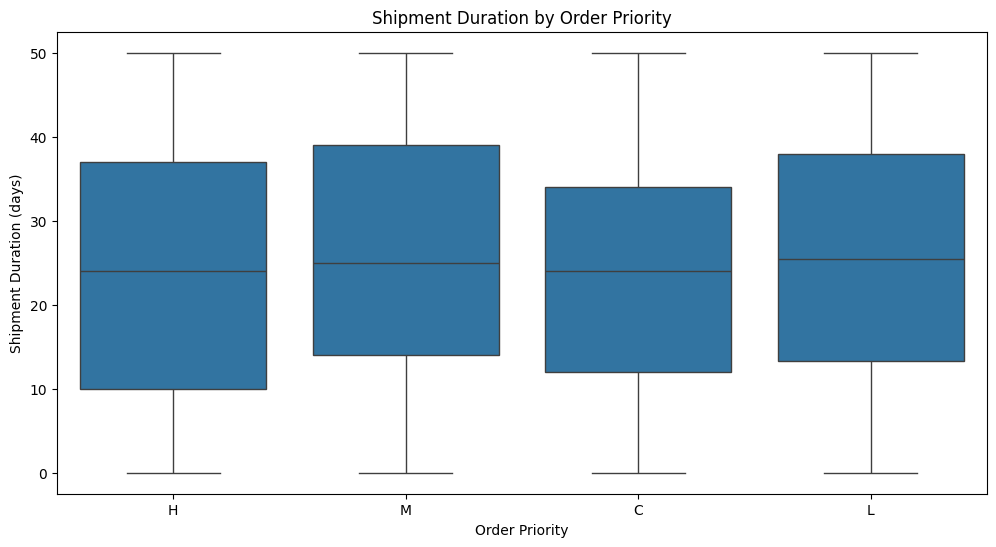

In [ ]:
total_info['Order Priority'] = total_info['Order Priority'].str.strip()

total_info['Shipment Duration (days)'] = total_info['Shipment Duration'].dt.total_seconds() / (24 * 3600)

plt.figure(figsize=(12, 6))
sns.boxplot(data=total_info, x='Order Priority', y='Shipment Duration (days)', order=['H', 'M', 'C', 'L'])
plt.title('Shipment Duration by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Shipment Duration (days)')
plt.show()


Almost for all the priority types, the shipping duration doesn't differ significantly

**Chanel for each country**

In [ ]:
total_info['Sales Channel'].unique()

array(['Online', 'Offline', 'online'], dtype=object)

In [ ]:
# Replace 'online' with 'Online'
total_info['Sales Channel'] = total_info['Sales Channel'].str.replace('online', 'Online')

In [ ]:
chanel_country = total_info.groupby('name')['Sales Channel'].value_counts().unstack()
chanel_country = chanel_country.fillna(0)
chanel_country = chanel_country.head(10)
chanel_country

Sales Channel,Offline,Online
name,,
Albania,11,10
Andorra,18,22
Armenia,16,13
Austria,15,13
Belarus,11,17
Belgium,13,13
Bosnia and Herzegovina,15,18
Bulgaria,15,15
Croatia,8,9


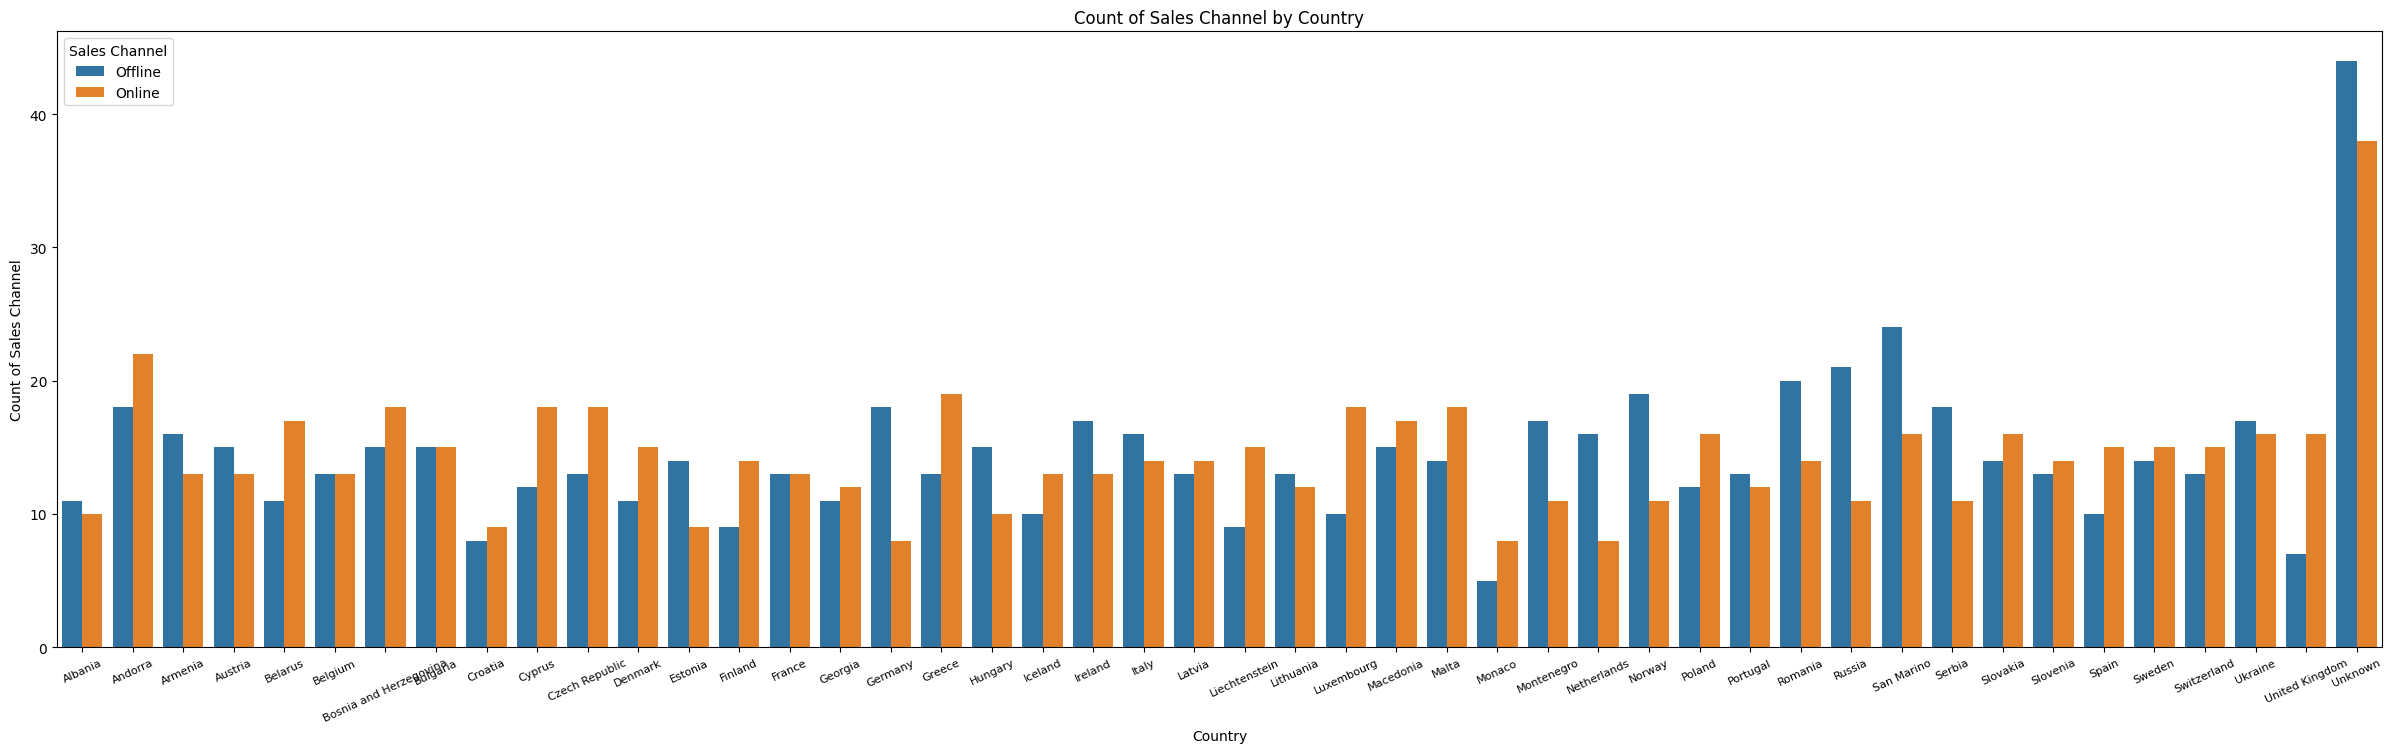

In [ ]:
country_channel = total_info.groupby(['name', 'Sales Channel']).size().reset_index(name='Count')

# Plot the barplot
plt.figure(figsize=(30, 8))
sns.barplot(data=country_channel, x='name', y='Count', hue='Sales Channel')
plt.xticks(rotation=25, fontsize =8)
plt.xlabel('Country')
plt.ylabel('Count of Sales Channel')
plt.title('Count of Sales Channel by Country')
plt.show()

- Mostly offline like to buy in San Marino, Russia, Romania
- Buying online preffer Andorra

**Correlation between profit and Sales Channel**

In [ ]:

profit_by_channel = total_info.groupby('Sales Channel')['Profit'].sum()
profit_by_channel

,Profit
Sales Channel,
Offline,2.534665e+08
Online,2.479679e+08


In [ ]:
sold_by_channel = total_info.groupby('Sales Channel')['Units Sold'].sum()
sold_by_channel

,Units Sold
Sales Channel,
Offline,3320363.0
Online,3256161.0


There is almost no difference between buying online and offline

# **RESULTS:**

- the most proffitable period was 2012 - 2013
- Average sales are 72269 units
- Average daily profit is 478011
- Max profit date was recorded at 2012-12-14 of the value of 3246187
- Most sold products are: Office Supplies, Bevarages, Fruits
- Most profitable products are: Cosmetics, Office Supply, Hosehold, Baby Food
- The most proffitable countries Andorra, Hungary, Czech Republic
- The longer average waiting time more than 30 days has Hungary( mostly buy Fruits) and the lowest waiting time has a Croatia (mostly buy Personal care, clothes). But there are no correlation between waiting time and the profit, number of sold units or even Shipping Priority
- Mostly offline like to buy in San Marino, Russia, Romania. Buying online preffer Andorra. But there are almost no difference between buying online or offline in case of profit or number of sold units


# **Conclusion and recomendations:**

- Southern regions like Sweden, Ireland, Liechtenstein, Iceland, Norway, Denmark, Luxembourg, Finland are tend to by less, so maybe it would be better to focus on sales to these countries, find how the company can be useful for these regions and advertise that
- Friuts are very low profitable, so the company shuld decide whether the shipping costs, costs for the storage and the force applied to their storage, sale and delivery. But Hungary - the country who buy the most, buy mostly fruits, so to through Fruits from the product list could lead to the lose of the one of the biggest buyer countries. So maybe a good decision will be to raise a price for a Fruits a little bit. That wouldn't harm the demand of the fruits and would bring more profit for the company.
- Georgia is the less profitable country, their favorite product is meat, which is also one of the less profitable products, so maybe it also would be a good decision to raise price a little bit to make more profit.
- Hungary should wait for their parcels longer than the other European countries. As we remember they buying mostly perishable fruits, which are perishable, so they could spoil quickly, so maybe it would be better to solve to improve client experience
